In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LEC = pd.read_csv('projectData/LEC1.csv',index_col='Unnamed: 0')

# 데이터 확인 겸 분석

In [3]:
# 가장 많이 사용된 챔피언 

LEC.groupby('champion', as_index=False).sum().sort_values('game', ascending=False).head(10)

,champion,game,kill,death,assist,kda,win,lose,dpm
34,비에고,63,57.3,54.7,82.2,55.2,32,31,6233
22,리 신,51,47.7,36.6,112.7,102.2,27,24,5725
88,트리스타나,43,30.9,17.2,33.4,77.2,20,23,3741
16,레오나,41,7.4,49.9,75.5,19.6,19,22,1288
32,브라움,37,4.0,33.3,88.6,35.2,23,14,1898
15,레넥톤,36,26.1,34.3,59.2,44.3,21,15,4415
50,알리스타,36,5.3,31.1,66.2,25.6,21,15,1036
29,바루스,31,31.0,20.4,43.1,53.8,20,11,5092
62,이즈리얼,30,20.5,15.6,28.3,30.0,12,18,4798
67,제이스,30,38.0,42.5,54.9,31.0,12,18,7910


In [4]:
# 총 사용된 챔피언 갯수
len(LEC.groupby('champion', as_index=False).sum().sort_values('game', ascending=False))

95

In [5]:
# 리신과 비에고는 스왑카드로 많이 사용되었으니 어떤 자리에서 활용되었는지 확인

LEC[(LEC['champion'] == '비에고') | (LEC['champion'] == '리 신') ].groupby(['line','champion'], as_index=False).sum().sort_values('game', ascending=False)

,line,champion,game,kill,death,assist,kda,win,lose,dpm
1,JG,비에고,42,28.2,25.0,45.1,28.2,23,19,2580
0,JG,리 신,35,26.3,22.0,55.8,36.9,18,17,2636
5,TOP,비에고,15,19.3,21.4,29.8,17.5,6,9,2635
4,TOP,리 신,13,14.4,8.6,33.9,42.8,7,6,1878
3,MID,비에고,6,9.8,8.3,7.3,9.5,3,3,1018
2,MID,리 신,3,7.0,6.0,23.0,22.5,2,1,1211


## 리신과 비에고
1. 정글에서 활용도가 가장 높으며 상황에 따라 탑, 미드에서 모두 사용할 수 있는 픽이었음
2. 스왑을 통해 상체 어떤 라인도 갈 수 있다는 장점이 있으며 성능도 좋았기에 모든 팀이 선호했을 것
3. 롤드컵에서도 스왑픽에 대한 고려를 많이 해야할 것 ( 세라핀 같은애들 )

가장 많이 픽된 카드에서 트리스타나가 3번째인 것을 확인가능

In [6]:
LEC[LEC['champion']== '트리스타나']

,call_name,player_name,line,champion,game,win_rate,kill,death,assist,kda,win,lose,dpm
307,FNC Upset,Elias Lipp1999.12.16,AD,트리스타나,11,54.5%,5.8,1.1,4.2,9.2,6,5,523
317,G2 Rekkles,Martin Larsson1996.09.20,AD,트리스타나,11,45.5%,4.8,1.0,3.4,8.2,5,6,499
333,MAD Carzzy,Matyáš Orság2002.01.31,AD,트리스타나,1,0%,5.0,6.0,4.0,1.5,0,1,444
340,VIT Crownshot,Juš Marušič1998.04.17,AD,트리스타나,2,50.0%,5.0,1.0,4.5,9.5,1,1,565
364,AST Jeskla,Jesper Klarin Strömberg2000.07.08,AD,트리스타나,4,25.0%,1.5,3.0,5.3,2.3,1,3,544
376,MSF Kobbe,Kasper Kobberup1996.09.21,AD,트리스타나,4,100.0%,4.5,0.3,6.0,42.0,4,0,436
383,SK Jezu,Jean Massol2000.07.27,AD,트리스타나,7,42.9%,3.0,2.1,4.3,3.4,3,4,376
392,S04 Neon,Matúš Jakubčík1999.04.24,AD,트리스타나,3,0%,1.3,2.7,1.7,1.1,0,3,354


## 다른 데이터를 통해 오브젝트와 관련된 데이터를 확인

In [7]:
LEC = pd.read_csv('projectData/LEC_RESULT.csv', index_col=0, encoding='CP949')
LEC['version'] = LEC['version'].str.replace('버전','')
LEC['version'] = LEC['version'].str.replace(' ','')
LEC['version'] = LEC['version'].str.replace('<!----><!---->','')
ind = LEC[LEC['version'] == '11.5'].index
LEC = LEC.drop(index=ind)
LEC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_date          685 non-null    object
 1   version            685 non-null    object
 2   team1_name         685 non-null    object
 3   team1_score        685 non-null    int64 
 4   team2_score        685 non-null    int64 
 5   team2_name         685 non-null    object
 6   gametime           685 non-null    object
 7   blue_team          685 non-null    object
 8   blue_score         685 non-null    int64 
 9   blue_ban           685 non-null    object
 10  blue_object        685 non-null    object
 11  blue_object_count  685 non-null    int64 
 12  blue_call_name     685 non-null    object
 13  blue_line          685 non-null    object
 14  blue_champion      685 non-null    object
 15  blue_kill          685 non-null    int64 
 16  blue_death         685 non-null    object
 1

In [8]:
# 오브젝트만 정리해서 확인하기
LEC_object = LEC[['blue_object','blue_object_count','red_object','red_object_count']]
LEC_object

,blue_object,blue_object_count,red_object,red_object_count
0,turret@blue,9,turret@red,2
1,inhibitor@blue,1,inhibitor@red,0
2,baron@blue,1,baron@red,1
3,dragon@blue,4,dragon@red,2
4,riftHerald@blue,0,riftHerald@red,2
...,...,...,...,...
680,turret@blue,3,turret@red,8
681,inhibitor@blue,0,inhibitor@red,1
682,baron@blue,0,baron@red,1
683,dragon@blue,3,dragon@red,1


In [9]:
# 터렛,억제기만 가져오기
a = LEC_object[LEC_object['blue_object'] == 'turret@blue']
aa = LEC_object[LEC_object['blue_object'] == 'inhibitor@blue']

LEC_turret = a.drop(columns=['blue_object','red_object'])
LEC_inhibitor = aa.drop(columns=['blue_object','red_object'])

In [10]:
# 터렛 파괴 갯수를 경기수로 나누어줌
LEC_turret.sum()/(90+34)

blue_object_count    6.669355
red_object_count     6.975806
dtype: float64

경기당 터렛을 12.5개 약 13개에 가까운 포탑을 밀어내는 경기를 보여줌

이는 LCK와 비교한다면 2개 더 많은 수치임

In [11]:
# 전령도 확인
b = LEC_object[LEC_object['blue_object'] == 'riftHerald@blue']
LEC_riftHerald = b.drop(columns=['blue_object','red_object'])

In [12]:
# 경기당 전령수
LEC_riftHerald.sum()/124

blue_object_count    1.282258
red_object_count     0.854839
dtype: float64

블루팀이 전령을 더 많이 먹는 것은 지형적 원인인가  다른 추가적인 문제점인가

<pre>
 LEC 같은 경우 경기당 거의 2마리 전령 먹음
 서로 나눠먹는 경우가 가장 많음
 
 </pre>

## 양 진영에서 자주 사용된 픽 확인

In [13]:
a =LEC['blue_champion'].value_counts().head(8)
b = LEC['red_champion'].value_counts().head(8)

In [14]:
# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

In [15]:
sns.set_palette('Pastel2')

C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


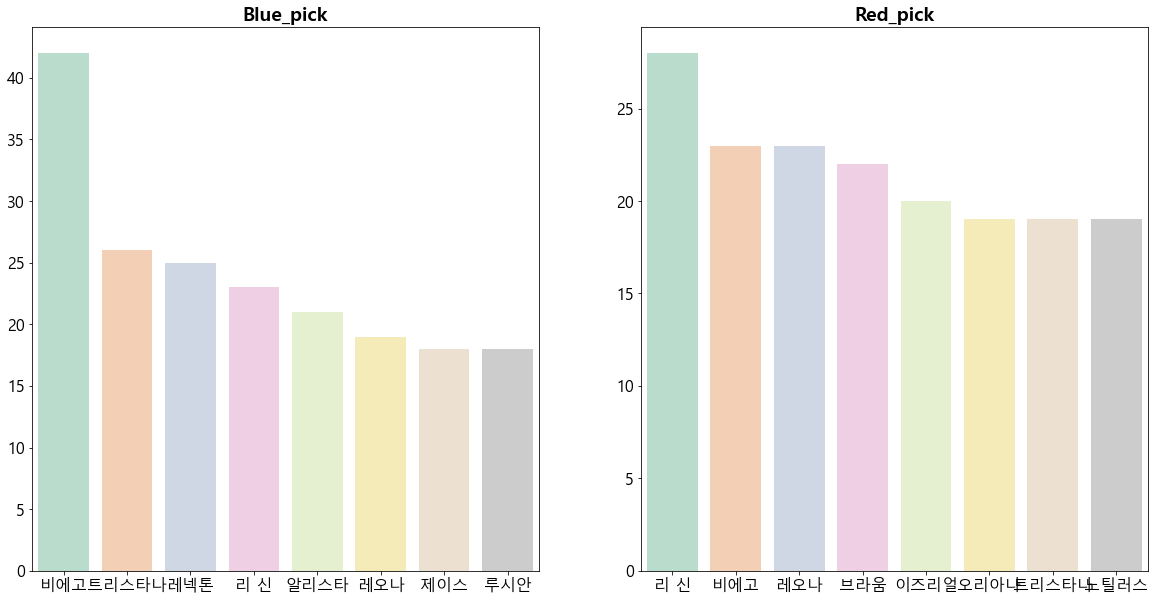

In [16]:
fig, ax1= plt.subplots(nrows=1, ncols=2, figsize=(20,10))


sns.barplot(a.index, a.values, ax=ax1[0])
ax1[0].set_title('Blue_pick', weight = 'bold')

sns.barplot(b.index, b.values, ax=ax1[1])
ax1[1].set_title('Red_pick', weight = 'bold')


plt.show()


## 트리스타나와 다른원딜의  데미지 비교

In [17]:
# 수집한 데이터 확인
lec_forTurret = pd.read_csv('LEC_forTurret_Tris.csv', index_col = 0)
lec_forTurret2 = pd.read_csv('LEC_forTurret_Varus.csv', index_col = 0)
lec_forTurret3 = pd.read_csv('LEC_forTurret_Kalista.csv', index_col = 0)
lec_forTurret4 = pd.read_csv('LEC_forTurret_JIGGS.csv', index_col = 0)

In [18]:
all_lec_forTurret = pd.concat([lec_forTurret,lec_forTurret2,lec_forTurret3,lec_forTurret4])

# 각 챔프별 데미지 타워 데미지

In [19]:
a = all_lec_forTurret.groupby('champion', as_index=False).mean()
b = a[(a['champion'] == ('Tristana')) | (a['champion'] == ('Kalista')) | (a['champion'] == ('Varus')) | (a['champion'] == ('Ziggs'))].sort_values('to_dmg_turrets')

In [20]:
b[['champion','to_dmg_turrets']]

,champion,to_dmg_turrets
72,Varus,4149.473684
30,Kalista,5472.666667
67,Tristana,7648.977273
83,Ziggs,24152.400000


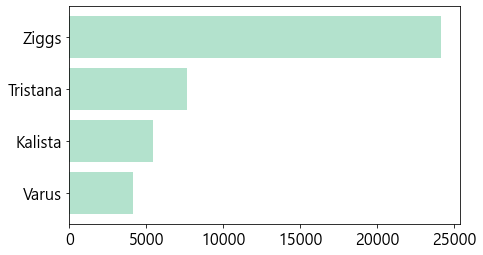

In [21]:
flg, ax = plt.subplots(figsize = (7,4))
ax.barh(b['champion'], b['to_dmg_turrets'])
plt.show()

트리스타나가 타워에 많은 데미지를 뽑아내는 것을 알 수있음

비교해보니 다른 리그에 비해서 타워 철거수가 2개정도 많음을 알 수있었음

직스랑비교하니까 그냥 직스는 비교불가..